We first load the libraries and the files to make the dataframes

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
movies = pd.read_csv('./data/processed_data/success_movies.csv')
actors = pd.read_csv('./data/processed_data/actor_ethnicities.csv')

To analyse diversity we will first list ethnicities and regroup them into broader ethnic groups.

In [43]:
#list ethnicities
ethnicities = actors['Actor_ethnicity'].unique().tolist()

In [44]:
ethnicities

['African Americans',
 'Omaha people',
 'Jewish people',
 'Irish Americans',
 'Indian Americans',
 'Italians',
 'German Americans',
 'Indian',
 'Ezhava',
 'Malayali',
 'Taiwanese',
 'Armenians',
 'Marathi people',
 'Lithuanian American',
 'Italian Americans',
 'Danish Americans',
 'American Jews',
 'Scottish Americans',
 'Puerto Ricans',
 'English people',
 'Irish people',
 'Russian Americans',
 'English Americans',
 'Gujarati people',
 'Spanish Americans',
 'Bihari people',
 'Nair',
 'Cuban Americans',
 'Russians',
 'Yoruba people',
 'Japanese people',
 'Filipino Americans',
 'Swedish Americans',
 'Finnish Americans',
 'Koreans',
 'French',
 'Welsh people',
 'White Americans',
 'Bengali',
 'Uruguayans',
 'Iranian peoples',
 'Mexicans',
 'Dutch Americans',
 'Hungarian Americans',
 'Spaniards',
 'Bunt',
 'Swedes',
 'Sindhis',
 'Tamil',
 'Italian Canadians',
 'Asian Americans',
 'Mexican Americans',
 'Punjabis',
 'White British',
 'Scottish Australian',
 'White Africans of European ances

In [45]:
# def categorize_ethnicity(ethnicity):
#   ethnic_groups = {
#       'East Asian': ['Taiwanese', 'Koreans', 'Chinese Americans', 'Hongkongers', 'Chinese Singaporeans', 'Korean American', 'Chinese Filipino', 'Malaysian Chinese', 'Chinese Indonesians', 'Chinese Canadians', 'Chinese Jamaicans', 'Han Chinese people', 'Zhuang people', 'Manchu', 'Buryats','Gin people', 'Japanese people', 'Koryo-saram', 'Ryukyuan people'],
#       'Southeast Asian': ['Filipino Americans', 'Vietnamese people', 'Lao people', 'Hmong American', 'Filipino people', 'Sri Lankan Tamils', 'Indonesian Americans', 'Filipino Australians', 'Kapampangan people', 'Ilocano', 'Filipino people of Spanish ancestry', 'Filipino mestizo', 'Aceh', 'Javanese', 'Thai people', 'Thai Americans', 'Thai Chinese people', 'Tibetan people','Sherpa'],
#       'South Asian': ['Indian Americans', 'Indian', 'Ezhava', 'Malayali', 'Marathi people', 'Gujarati people', 'Bihari people', 'Nair', 'Bengali', 'Bunt', 'Sindhis', 'Tamil', 'Punjabis', 'British Indian', 'Telugu people', 'Kayastha', 'Brahmin caste', 'Kashmiri Pandit', 'Jaat', 'Tulu people', 'Marwari', 'Bhutia', 'Agrawal', 'Mudaliar', 'Sinhalese', 'Bengali Brahmins', 'Kannada people', 'Konkani people', 'Chettiar', 'Dalit', 'Dogra', 'Hazaras', 'Nepali Indian', 'Sikh', 'Niyogi', 'Kashmiri people', 'Rohilla', 'Indian diaspora in France', 'Muhajir', 'Hindu', 'Rajput', 'Khatri', 'Indian diaspora'],
#       'North African': ['Berber', 'Egyptians', 'Moroccans', 'Sudanese Arabs', 'Arab Mexican','Copts', 'Kabyle people', 'Arabs','Arabs in Bulgaria', 'History of the Jews in Morocco'],
#       'Sub-Saharan African': ['Yoruba people', 'Akan people', 'Xhosa people', 'Kikuyu', 'Mandinka people', 'Wolof people', 'Malagasy people', 'Sierra Leone Creole people', 'African people', 'Nigerian Americans', 'Somalis',  'White South Africans', 'Afrikaners'],
#       'Middle Eastern': ['Jewish people', 'Armenians', 'American Jews', 'Iranian peoples', 'Iraqi Americans', 'Lebanese Americans', 'Syrian Americans', 'Israeli Americans', 'Lebanese', 'British Jews', 'culture of Palestine', 'Israeli Jews', 'Lithuanian Jews', 'Assyrian people', 'Iranian Canadians', 'Persians', 'Arab Americans', 'Palestinian Americans', 'Armenians of Russia', 'Kurds', 'demographics of Iraq', 'Muslim', 'Pashtuns', 'Ashkenazi Jews', 'Lebanese immigration to Mexico', 'Turkish Americans', 'Tatars', 'Azerbaijanis'],
#       'European descent American': ['Irish Americans', 'German Americans', 'Lithuanian American', 'Italian Americans', 'Danish Americans', 'Scottish Americans', 'English Americans', 'Spanish Americans', 'Swedish Americans', 'Finnish Americans', 'White Americans', 'Dutch Americans', 'Hungarian Americans', 'Italian Canadians', 'Americans', 'Serbian Americans', 'Polish Americans', 'French Canadians', 'Czech Americans', 'British Americans', 'Sicilian Americans', 'French Chilean', 'Albanian American', 'Austrian Americans', 'French Americans', 'Slovak Americans', 'Latvian American', 'Norwegian Americans', 'Portuguese Americans', 'Irish Canadians', 'Italian Brazilians', 'English Canadians', 'Cajun', 'Chilean American', 'Welsh Americans', 'Swedish Canadians', 'German Brazilians', 'Greek Americans', 'Luxembourgish Americans','Danish Canadians', 'Russian Americans' 'Polish Canadians','Serbian Canadians','Romanian Americans',  'Bulgarian Canadians','Ukrainian Americans', 'Ukrainian Canadians', 'Dutch Canadians', 'Croatian Americans', 'Slovene Americans', 'Acadians'],
#       'Eastern European': ['Russians', 'Slovaks', 'Hungarians', 'Latvians', 'Belarusians', 'Soviet people', 'Czechs', 'Serbs of Croatia', 'Bosnians', 'Romani people', 'Greeks in South Africa', 'Romanichal', 'Aromanians', 'Swedish-speaking population of Finland', 'Baltic Russians', 'Transylvanian Saxons', 'Yugoslavs', 'Bulgarians', 'Bohemian', 'Hutsuls', 'Romanians', 'Serbs of Bosnia and Herzegovina','Slovenes', 'Slavs', 'Bosniaks', 'Poles', 'Serbs in North Macedonia', 'Croats', 'Albanians', 'Ossetians', 'Peoples of the Caucasus', 'Georgians'],
#       'Northern European': ['English people', 'Irish people', 'Welsh people', 'Swedes',  'Norwegians', 'Danes', 'Sámi peoples', 'Anglo-Irish people', 'Swedish-speaking population of Finland', 'Finns', 'Icelanders', 'Manx people','Parsi', 'White British', 'Irish migration to Great Britain', 'Poles in the United Kingdom'],
#       'Western European': ['French', 'Germans', 'Spaniards', 'Austrians', 'Swiss', 'Galicians', 'Castilians', 'Portuguese', 'Belgians', 'Corsicans','Dutch'],
#       'Southern European': ['Italians', 'Spaniards', 'Greeks', 'names of the Greeks', 'Dalmatian Italians', 'Catalan people', 'Greeks in South Africa',  'Greeks in the United Kingdom', 'Romani people in Spain', 'Greek Cypriots', 'Italians in the United Kingdom', 'Gibraltarian people', 'Basque people'],
#       'Indigenous peoples of the Americas': ['Omaha people', 'Cherokee', 'Native Hawaiians', 'First Nations', 'Mohawk people', 'Inuit', 'Sioux', 'Lumbee', 'Cree', 'Apache', 'Haudenosaunee', 'Inupiat people', 'Cheyennes', 'Dene', 'Aymara', 'Oneida', 'Blackfoot Confederacy', 'Ojibwe', 'Indo-Canadians', 'Choctaw', 'Quebeckers', 'Ho-Chunk', 'Nez Perce'],
#       'Oceania and Pacific Islander': ['Pacific Islander Americans', 'Samoan New Zealanders', 'Māori', 'Kiwi', 'Greek Australians', 'Australian Americans', 'Italian Australian','Australian Americans','Anglo-Celtic Australians', 'Swedish Australian', 'English Australian', 'Australians', 'Scottish Australian', 'Dutch Australian', 'Irish Australian', 'Croatian Australians', 'Polish Australians', 'Serbian Australians'],
#       'Mixed Ethnicities/Global Diaspora': ['multiracial people', 'Afro-Asians', 'Métis', 'Asian Americans', 'Taiwanese Americans', 'Japanese Brazilians', 'White Africans of European ancestry', 'African Americans', 'British Pakistanis', 'Iranians in the United Kingdom', 'Black Britons', 'British Chinese', 'Anglo-Indian people', 'Brazilian Americans', 'History of the Jews in India'],
#       'Hispanic': ['Puerto Ricans', 'Spanish Americans', 'Cuban Americans', 'Mexican Americans', 'Stateside Puerto Ricans', 'Dominican Americans', 'Mexican Americans', 'Hispanic', 'Tejano', 'Spanish immigration to Mexico', 'Italian immigration to Mexico','Cuban Americans', 'Mexican Americans', 'Bolivian American', 'Uruguayans', 'Mexicans', 'Argentines', 'Brazilians', 'Ecuadorian Americans', 'White Latin American', 'Hondurans', 'Venezuelans', 'Honduran Americans', 'Colombians', 'Chileans', 'Chileans in the United Kingdom', 'Salvadoran Americans','Venezuelan Americans', 'Latino', 'Panamanian Americans'],
#       'Caribbean': ['Haitian Americans', 'Bahamian Americans', 'Louisiana Creole people', 'British African-Caribbean people'],
#   }

#   for group, ethnicities in ethnic_groups.items():
#     if ethnicity in ethnicities:
#       return group
#   return 'Other'  # For ethnicities not categorized


In [64]:
ethnic_groups = {
      'East Asian': ['Taiwanese', 'Koreans', 'Chinese Americans', 'Hongkongers', 'Chinese Singaporeans', 'Korean American', 'Chinese Filipino', 'Malaysian Chinese', 'Chinese Indonesians', 'Chinese Canadians', 'Chinese Jamaicans', 'Han Chinese people', 'Zhuang people', 'Manchu', 'Buryats','Gin people', 'Japanese people', 'Koryo-saram', 'Ryukyuan people'],
      'Southeast Asian': ['Filipino Americans', 'Vietnamese people', 'Lao people', 'Hmong American', 'Filipino people', 'Sri Lankan Tamils', 'Indonesian Americans', 'Filipino Australians', 'Kapampangan people', 'Ilocano', 'Filipino people of Spanish ancestry', 'Filipino mestizo', 'Aceh', 'Javanese', 'Thai people', 'Thai Americans', 'Thai Chinese people', 'Tibetan people','Sherpa'],
      'South Asian': ['Indian Americans', 'Indian', 'Ezhava', 'Malayali', 'Marathi people', 'Gujarati people', 'Bihari people', 'Nair', 'Bengali', 'Bunt', 'Sindhis', 'Tamil', 'Punjabis', 'British Indian', 'Telugu people', 'Kayastha', 'Brahmin caste', 'Kashmiri Pandit', 'Jaat', 'Tulu people', 'Marwari', 'Bhutia', 'Agrawal', 'Mudaliar', 'Sinhalese', 'Bengali Brahmins', 'Kannada people', 'Konkani people', 'Chettiar', 'Dalit', 'Dogra', 'Hazaras', 'Nepali Indian', 'Sikh', 'Niyogi', 'Kashmiri people', 'Rohilla', 'Indian diaspora in France', 'Muhajir', 'Hindu', 'Rajput','rajput', 'Khatri', 'Indian diaspora','Pakistanis'],
      'North African': ['Berber', 'Egyptians', 'Moroccans', 'Sudanese Arabs', 'Arab Mexican','Copts', 'Kabyle people', 'Arabs','Arabs in Bulgaria', 'History of the Jews in Morocco', 'Sephardi Jews'],
      'Sub-Saharan African': ['Yoruba people', 'Akan people', 'Xhosa people', 'Kikuyu', 'Mandinka people', 'Wolof people', 'Malagasy people', 'Sierra Leone Creole people', 'African people', 'Nigerian Americans', 'Somalis',  'White South Africans', 'Afrikaners'],
      'Middle Eastern': ['Jewish people', 'Armenians', 'American Jews', 'Iranian peoples', 'Iraqi Americans', 'Lebanese Americans', 'Syrian Americans', 'Israeli Americans', 'Lebanese', 'British Jews', 'culture of Palestine', 'Israeli Jews','Israelis', 'Lithuanian Jews', 'Assyrian people', 'Iranian Canadians', 'Persians', 'Arab Americans', 'Palestinian Americans', 'Armenians of Russia', 'Kurds', 'demographics of Iraq', 'Muslim', 'Pashtuns', 'Ashkenazi Jews', 'Lebanese immigration to Mexico', 'Turkish Americans', 'Tatars', 'Azerbaijanis'],
      'European descent American': ['Irish Americans', 'German Americans', 'Lithuanian American', 'Italian Americans', 'Danish Americans', 'Scottish Americans', 'English Americans', 'Spanish Americans', 'Swedish Americans', 'Armenian American','Finnish Americans', 'White Americans', 'Dutch Americans', 'Hungarian Americans', 'Italian Canadians', 'Americans', 'Serbian Americans', 'Polish Americans', 'French Canadians', 'Czech Americans', 'British Americans', 'Sicilian Americans', 'French Chilean', 'Albanian American', 'Austrian Americans', 'French Americans', 'Slovak Americans', 'Latvian American', 'Norwegian Americans', 'Portuguese Americans', 'Irish Canadians', 'Italian Brazilians', 'English Canadians', 'Cajun', 'Chilean American', 'Welsh Americans', 'Swedish Canadians', 'German Brazilians','German Canadians' ,'Greek Americans', 'Luxembourgish Americans','Danish Canadians', 'Russian Americans', 'Polish Canadians','Serbian Canadians','Romanian Americans',  'Bulgarian Canadians','Ukrainian Americans', 'Ukrainian Canadians', 'Dutch Canadians', 'Croatian Americans', 'Croatian Canadians','Slovene Americans', 'Acadians','Greek Canadians'],
      'Eastern European': ['Russians', 'Slovaks', 'Hungarians', 'Latvians', 'Belarusians', 'Soviet people', 'Czechs', 'Serbs of Croatia', 'Bosnians', 'Romani people', 'Greeks in South Africa', 'Romanichal', 'Aromanians', 'Swedish-speaking population of Finland', 'Baltic Russians', 'Transylvanian Saxons', 'Yugoslavs', 'Bulgarians', 'Bohemian', 'Hutsuls', 'Romanians', 'Serbs of Bosnia and Herzegovina','Slovenes', 'Slavs', 'Bosniaks', 'Poles', 'Serbs in North Macedonia', 'Croats', 'Albanians', 'Ossetians', 'Peoples of the Caucasus', 'Georgians','Ukrainians','Serbs in the United Kingdom','peoples of the Caucasus'],
      'Northern European': ['English people', 'Irish people', 'Welsh people', 'Swedes',  'Norwegians', 'Danes', 'Sámi peoples', 'Anglo-Irish people', 'Swedish-speaking population of Finland', 'Finns', 'Icelanders', 'Manx people','Parsi', 'White British', 'Irish migration to Great Britain', 'Poles in the United Kingdom'],
      'Western European': ['French', 'Germans', 'Spaniards', 'Austrians', 'Swiss', 'Galicians', 'Castilians', 'Portuguese', 'Belgians', 'Corsicans','Dutch'],
      'Southern European': ['Italians', 'Spaniards', 'Greeks', 'names of the Greeks', 'Dalmatian Italians', 'Catalan people', 'Greeks in South Africa',  'Greeks in the United Kingdom', 'Romani people in Spain', 'Greek Cypriots', 'Italians in the United Kingdom', 'Gibraltarian people', 'Basque people'],
      'Indigenous peoples of the Americas': ['Omaha people', 'Cherokee', 'Native Hawaiians', 'First Nations', 'Mohawk people', 'Inuit', 'Sioux', 'Lumbee', 'Cree', 'Apache', 'Haudenosaunee', 'Inupiat people', 'Cheyennes', 'Dene', 'Aymara', 'Oneida', 'Blackfoot Confederacy', 'Ojibwe', 'Indo-Canadians', 'Choctaw', 'Quebeckers', 'Ho-Chunk', 'Nez Perce'],
      'Oceania and Pacific Islander': ['Pacific Islander Americans', 'Samoan New Zealanders', 'Māori', 'Kiwi', 'Greek Australians', 'Australian Americans', 'Italian Australian','Australian Americans','Anglo-Celtic Australians', 'Swedish Australian', 'English Australian', 'Australians', 'Scottish Australian', 'Dutch Australian', 'Irish Australian', 'Croatian Australians', 'Polish Australians', 'Serbian Australians','Indian Australian'],
      'Mixed Ethnicities/Global Diaspora': ['freebase_id\n/m/017sq0    Eurasian\n/m/017sq0     Eurasia\nName: label, dtype: object','multiracial people', 'Afro-Asians', 'Métis', 'Asian Americans', 'Taiwanese Americans', 'Japanese Brazilians', 'White Africans of European ancestry', 'African Americans', 'British Pakistanis', 'Iranians in the United Kingdom', 'Black Britons', 'British Chinese', 'Anglo-Indian people', 'Brazilian Americans', 'History of the Jews in India','history of the Jews in India','Afro-Cuban','Vietnamese Americans','British Asian','Iranian Americans'],
      'Hispanic': ['Puerto Ricans', 'Spanish Americans', 'Cuban Americans', 'Mexican Americans', 'Stateside Puerto Ricans', 'Dominican Americans', 'Mexican Americans', 'Hispanic', 'Tejano', 'Spanish immigration to Mexico', 'Italian immigration to Mexico','Cuban Americans', 'Cubans', 'Mexican Americans', 'Bolivian American', 'Uruguayans', 'Mexicans', 'Argentines', 'Brazilians', 'Ecuadorian Americans', 'White Latin American', 'Hondurans', 'Venezuelans', 'Honduran Americans', 'Colombians', 'Chileans', 'Chileans in the United Kingdom', 'Salvadoran Americans','Venezuelan Americans', 'Latino', 'Panamanian Americans','Colombian Americans','Que viva el amor de Chaves',],
      'Caribbean': ['Haitian Americans', 'Bahamian Americans', 'Louisiana Creole people', 'British African-Caribbean people'],
  }

In [65]:
num_ethnicities = sum(len(ethnicities) for ethnicities in ethnic_groups.values())
print(num_ethnicities)

366


In [66]:
ethnicity_to_group = {}

for group, ethnicities in ethnic_groups.items():
    for ethnicity in ethnicities:
        ethnicity_to_group[ethnicity] = group

classified_ethnicities = {ethnicity: ethnicity_to_group.get(ethnicity, 'Unknown') for ethnicity in ethnicities}

In [67]:
actors['ethnic_group'] = actors['Actor_ethnicity'].map(ethnicity_to_group)
actors.sample(20)

,Wikipedia_movie_ID,Actor_ethnicity,ethnic_group
60148,5017604,African Americans,Mixed Ethnicities/Global Diaspora
70460,5024840,Colombians,Hispanic
45707,2179113,Malayali,South Asian
5529,2387927,Irish Americans,European descent American
84558,20579781,Parsi,Northern European
12201,24301781,Jewish people,Middle Eastern
45125,2397021,Italians,Southern European
11216,3251187,Slovene Americans,European descent American
71917,14173282,Bihari people,South Asian
50283,24731602,English people,Northern European


In [69]:
#We have some NaN values, so we will locate and fix them 
actors_isnull = actors.isnull()
nan_lines = actors[actors['ethnic_group'].isnull() == True]['Actor_ethnicity']

In [ ]:
nan_lines.value_counts() # We don't have any NaN anymore

Series([], Name: count, dtype: int64)

We can now start with the calculation of the naive Diversity Coefficient

In [71]:
mov_div = actors.groupby('Wikipedia_movie_ID').agg(ethnicity_number=('ethnic_group','nunique'),actor_number=('Wikipedia_movie_ID','size')).reset_index()
mov_div['naive_diversity']=mov_div['ethnicity_number']/mov_div['actor_number']

In [73]:
#now we want to add an entropy to reward equal representation.
ethn_count = actors.groupby(['Wikipedia_movie_ID','ethnic_group']).agg('size').reset_index(name='num_actors')
tot_actors = ethn_count.groupby('Wikipedia_movie_ID')['num_actors'].transform('sum')

ethn_count['proportion'] = ethn_count['num_actors']/tot_actors
ethn_count['entropy'] = 1-ethn_count['proportion'] * np.log(ethn_count['proportion'])

entropy_by_movie = ethn_count.groupby('Wikipedia_movie_ID')['entropy'].sum().reset_index()

# Normalize entropy
max_entropy = np.log(len(actors['ethnic_group'].unique()))  # Maximum possible entropy
entropy_by_movie['normalized_entropy'] = entropy_by_movie['entropy'] / max_entropy

# merge everything back together
diversity_final = mov_div.merge(entropy_by_movie[['Wikipedia_movie_ID', 'normalized_entropy']], on='Wikipedia_movie_ID', how='left')

In [74]:
diversity_final['diversity']= diversity_final['naive_diversity']*diversity_final['normalized_entropy']

In [75]:
diversity_final.head(50)

,Wikipedia_movie_ID,ethnicity_number,actor_number,naive_diversity,normalized_entropy,diversity
0,330,1,1,1.000000,0.360674,0.360674
1,3217,1,2,0.500000,0.360674,0.180337
2,3333,1,1,1.000000,0.360674,0.360674
3,3746,4,4,1.000000,1.942695,1.942695
4,3837,3,9,0.333333,1.478262,0.492754
5,3947,1,3,0.333333,0.360674,0.120225
6,4227,2,2,1.000000,0.971348,0.971348
7,4231,4,8,0.500000,1.895515,0.947757
8,4560,3,7,0.428571,1.369230,0.586813
9,4726,2,5,0.400000,0.901830,0.360732


<Axes: ylabel='diversity'>

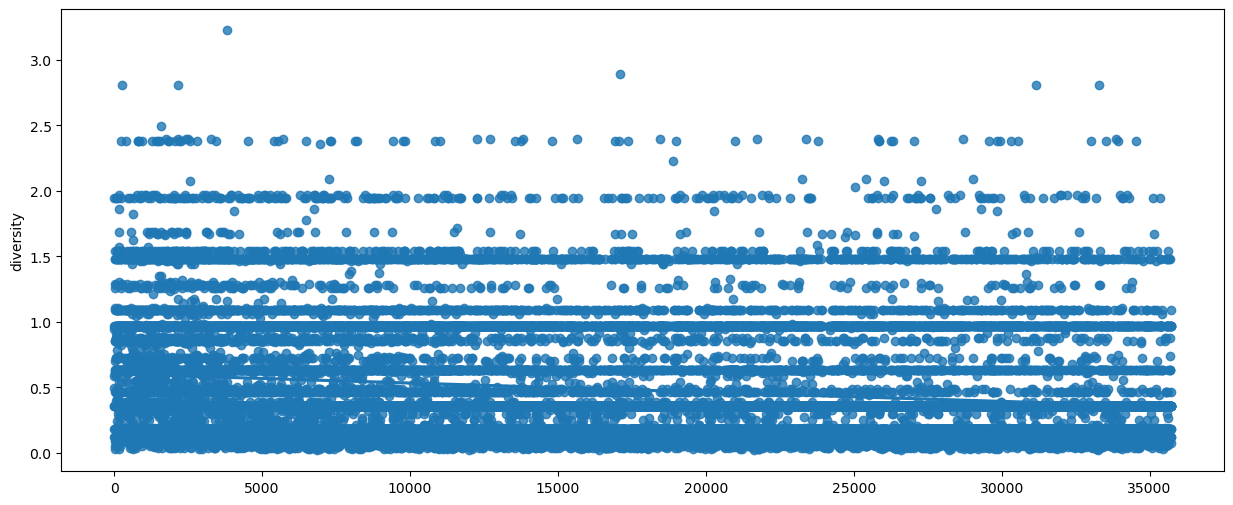

In [83]:
plt.figure(figsize=(15,6))
sns.regplot(x=diversity_final.index, y="diversity", data=diversity_final)


In [84]:
movies_bis = pd.merge(movies,diversity_final[['Wikipedia_movie_ID','diversity']],on='Wikipedia_movie_ID', how='left')

In [85]:
movies_bis.sample(10)

,Movie_name,Movie_release_date,Ratings,Wikipedia_movie_ID,Actor_ethnicity,Movie_countries,Movie_box_office_revenue,Nomination,Success,diversity
6306,Gantz,2010,6.4,31572779.0,Japanese people,{'Japan'},NaN,False,0,0.360674
10811,Mostly Martha,2001,7.2,1515876.0,Danes,"{'Austria', 'Italy', 'Switzerland', 'Germany'}",NaN,False,0,0.971348
18041,The Mighty Ducks,1992,6.6,552592.0,English people,{'United States of America'},NaN,False,0,0.971348
15332,Sunny,1984,5.6,32189402.0,Indian,{'India'},70016220.0,True,1,0.360732
13967,Saw III,2006,6.2,3636498.0,Jewish people,"{'Canada', 'United States of America'}",NaN,False,0,1.942695
21011,Who Am I?,1998,6.8,190053.0,Hongkongers,"{'Hong Kong', 'United States of America'}",NaN,False,0,0.360674
15874,The 24th Day,2004,6.4,5024840.0,Colombians,{'United States of America'},NaN,False,0,0.360674
17582,The Killer,1989,7.7,451877.0,Hongkongers,"{'Hong Kong', 'China'}",NaN,False,1,0.360674
15553,Take This Waltz,2011,6.5,33058811.0,Jewish people,"{'Canada', 'Spain', 'Japan'}",994790.0,False,0,0.120225
15831,That Beautiful Somewhere,2006,5.3,6367539.0,First Nations,{'Canada'},NaN,False,0,0.360674
